In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

**Automating the Data pull**

In [2]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '5268c366-db71-4978-8c59-265f4402275a',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)



    pd.set_option('display.max_columns', None)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'/Users/manojgowdavenkatachalamurthy/Documents/Data_Analytics/Projects/Crypto API Automation/API.csv'):
        df.to_csv(r'/Users/manojgowdavenkatachalamurthy/Documents/Data_Analytics/Projects/Crypto API Automation/API.csv', header='column_names')
    else:
        df.to_csv(r'/Users/manojgowdavenkatachalamurthy/Documents/Data_Analytics/Projects/Crypto API Automation/API.csv', mode='a', header=False)

In [3]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed Successfully')
    sleep(60)
exit()

API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully


KeyboardInterrupt: 

In [4]:
df2 = pd.read_csv(r'/Users/manojgowdavenkatachalamurthy/Documents/Data_Analytics/Projects/Crypto API Automation/API.csv')
df2

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10594,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.956051e+07,1.956051e+07,False,NaN,1,NaN,NaN,NaN,2023-12-04T04:30:00.000Z,40705.131509,1.958846e+10,22.7877,-0.416131,3.283239,9.111624,17.260017,47.095628,58.516404,7.962132e+11,52.3374,8.548078e+11,NaN,2023-12-04T04:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-03 23:30:50.549730
1,1,1027,Ethereum,ETH,ethereum,7950,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202330e+08,1.202330e+08,True,NaN,2,NaN,NaN,NaN,2023-12-04T04:30:00.000Z,2218.225588,9.087397e+09,-6.2037,-0.038315,2.689496,8.423701,20.956966,34.988933,36.979515,2.667040e+11,17.5312,2.667040e+11,NaN,2023-12-04T04:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-03 23:30:50.549730
2,2,825,Tether USDt,USDT,tether,67233,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.964760e+10,9.260995e+10,True,NaN,3,NaN,NaN,NaN,2023-12-04T04:29:00.000Z,1.000270,3.644201e+10,11.9672,-0.000318,-0.008839,0.000496,-0.011474,0.018098,0.069709,8.967178e+10,5.8943,9.263493e+10,NaN,2023-12-04T04:29:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-03 23:30:50.549730
3,3,1839,BNB,BNB,bnb,1810,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.516982e+08,1.516982e+08,False,NaN,4,NaN,NaN,NaN,2023-12-04T04:29:00.000Z,228.483611,7.101845e+08,7.0328,-0.539416,-0.000212,-0.187862,-1.133875,7.326596,6.608296,3.466056e+10,2.2783,3.466056e+10,NaN,2023-12-04T04:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-03 23:30:50.549730
4,4,52,XRP,XRP,xrp,1162,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.388857e+10,9.998819e+10,False,NaN,5,NaN,NaN,NaN,2023-12-04T04:30:00.000Z,0.628890,1.113342e+09,57.0428,-0.301191,1.581373,3.111638,2.784275,18.784241,24.255648,3.388996e+10,2.2277,6.288896e+10,NaN,2023-12-04T04:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-03 23:30:50.549730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,10,1975,Chainlink,LINK,chainlink,1481,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",1.000000e+09,5.568500e+08,1.000000e+09,False,NaN,11,NaN,NaN,NaN,2023-12-05T21:21:00.000Z,15.559711,6.275665e+08,-37.8656,-0.704020,-0.344329,6.188391,29.827408,102.275057,148.968483,8.664425e+09,0.5453,1.555971e+10,NaN,2023-12-05T21:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2023-12-05 16:22:40.480800
401,11,5805,Avalanche,AVAX,avalanche,576,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",7.200000e+08,3.652235e+08,4.332564e+08,False,NaN,12,NaN,NaN,NaN,2023-12-05T21:21:00.000Z,23.496754,7.284282e+08,7.1312,-1.192964,6.903902,13.361275,90.719172,120.423089,136.869461,8.581568e+09,0.5399,1.691766e+10,NaN,2023-12-05T21:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-05 16:22:40.480800
402,12,11419,Toncoin,TON,toncoin,175,2021-08-26T13:40:22.000Z,"['pos', 'ftx-bankruptcy-estate', 'dwf-labs-por...",NaN,3.454271e+09,5.099155e+09,True,NaN,13,3.414167e+09,8.229583e+09,NaN,2023-12-05T21:22:00.000Z,2.410422,5.024772e+07,11.6480,-0.017236,0.701431,-0.558188,5.974466,12.137422,32.079328,8.3262

**Transforming Data**

In [5]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [6]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10599,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19562031.00000,19562031.00000,False,NaN,1,NaN,NaN,None,2023-12-05T21:22:00.000Z,43793.65083,34894848829.83197,-12.42080,0.76822,4.82273,14.80530,25.15390,56.54308,70.42103,856692755202.54236,53.87240,919666667497.53003,None,2023-12-05T21:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-05 16:22:40.480800
1,1027,Ethereum,ETH,ethereum,7963,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120230295.78435,120230295.78435,True,NaN,2,NaN,NaN,None,2023-12-05T21:22:00.000Z,2269.96948,14837660870.90562,-11.52510,0.57067,1.91427,9.98536,20.52610,37.82612,39.24718,272919101615.47379,17.17040,272919101615.47000,None,2023-12-05T21:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-05 16:22:40.480800
2,825,Tether USDt,USDT,tether,67361,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,89814116890.37746,92609951831.97562,True,NaN,3,NaN,NaN,None,2023-12-05T21:21:00.000Z,1.00007,58543370603.89955,-21.26900,0.00524,0.00266,-0.03684,-0.06698,-0.05054,0.07393,89820343511.94359,5.65260,92616372282.83000,None,2023-12-05T21:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-05 16:22:40.480800
3,1839,BNB,BNB,bnb,1813,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151697927.87259,151697927.87259,False,NaN,4,NaN,NaN,None,2023-12-05T21:21:00.000Z,230.60835,846774700.44791,-60.51170,-0.06316,-0.48843,-0.19980,-5.30119,8.04700,7.49230,34982808704.53668,2.20160,34982808704.54000,None,2023-12-05T21:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-05 16:22:40.480800
4,52,XRP,XRP,xrp,1166,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53888571585.00000,99988188647.00000,False,NaN,5,NaN,NaN,None,2023-12-05T21:22:00.000Z,0.62073,1427334579.67545,-25.99000,-0.04091,-0.27886,1.34010,-5.09316,17.81666,23.74579,33450192266.05004,2.10330,62072887223.01000,None,2023-12-05T21:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-05 16:22:40.480800
5,5426,Solana,SOL,solana,557,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,424473267.01618,564189723.34746,True,NaN,6,NaN,NaN,None,2023-12-05T21:22:00.000Z,61.02109,1686327811.77527,-24.95030,-0.25807,-0.54411,4.38485,49.44776,160.97950,211.17965,25901820201.27614,1.62960,34427470253.38000,None,2023-12-05T21:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-05 16:22:40.480800
6,3408,USDC,USDC,usd-coin,15282,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24242639224.78403,24242639224.78403,False,NaN,7,NaN,NaN,None,2023-12-05T21:21:00.000Z,1.00005,6648454372.12552,-10.92910,0.00194,0.00781,0.02358,0.00455,-0.00355,-0.00069,24243763115.12629,1.52640,24243763115.13000,None,2023-12-05T21:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-05 16:22:40.480800
7,2010,Cardano,ADA,cardano,990,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35315362824.32500,36410042820.42500,False,NaN,8,NaN,NaN,None,2023-12-05T21:21:00.000Z,0.41866,489902222.76210,-11.43450,-0.74388,4.27507,8.13298,21.11353,57.78645,62.85375,14785251593.94676,0.93050,18839855193.82000,None,2023-12-05T21:21:00.000Z

In [7]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.76822,4.82273,14.80530,25.15390,56.54308,70.42103
Ethereum,0.57067,1.91427,9.98536,20.52610,37.82612,39.24718
Tether USDt,0.00524,0.00266,-0.03684,-0.06698,-0.05054,0.07393
BNB,-0.06316,-0.48843,-0.19980,-5.30119,8.04700,7.49230
XRP,-0.04091,-0.27886,1.34010,-5.09316,17.81666,23.74579
Solana,-0.25807,-0.54411,4.38485,49.44776,160.97950,211.17965
USDC,0.00194,0.00781,0.02358,0.00455,-0.00355,-0.00069
Cardano,-0.74388,4.27507,8.13298,21.11353,57.78645,62.85375
Dogecoin,-1.13911,3.85862,15.14026,30.84631,51.51771,46.74201


In [8]:
df4 = df3.stack()
df4

name                                  
Bitcoin   quote.USD.percent_change_1h     0.76822
          quote.USD.percent_change_24h    4.82273
          quote.USD.percent_change_7d    14.80530
          quote.USD.percent_change_30d   25.15390
          quote.USD.percent_change_60d   56.54308
                                           ...   
Polkadot  quote.USD.percent_change_24h    3.57695
          quote.USD.percent_change_7d     9.15496
          quote.USD.percent_change_30d   20.42855
          quote.USD.percent_change_60d   41.74429
          quote.USD.percent_change_90d   36.19676
Length: 90, dtype: float64

In [9]:
type(df4)

pandas.core.series.Series

In [10]:
# Conversion of Series to Dataframe

df5 = df4.to_frame(name='values')
df5

values
name                                          
Bitcoin  quote.USD.percent_change_1h   0.76822
         quote.USD.percent_change_24h  4.82273
         quote.USD.percent_change_7d  14.80530
         quote.USD.percent_change_30d 25.15390
         quote.USD.percent_change_60d 56.54308
...                                        ...
Polkadot quote.USD.percent_change_24h  3.57695
         quote.USD.percent_change_7d   9.15496
         quote.USD.percent_change_30d 20.42855
         quote.USD.percent_change_60d 41.74429
         quote.USD.percent_change_90d 36.19676

[90 rows x 1 columns]

In [11]:
df5.count()

values    90
dtype: int64

In [12]:
# Creating index

index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.76822
1,Bitcoin,quote.USD.percent_change_24h,4.82273
2,Bitcoin,quote.USD.percent_change_7d,14.80530
3,Bitcoin,quote.USD.percent_change_30d,25.15390
4,Bitcoin,quote.USD.percent_change_60d,56.54308
...,...,...,...
85,Polkadot,quote.USD.percent_change_24h,3.57695
86,Polkadot,quote.USD.percent_change_7d,9.15496
87,Polkadot,quote.USD.percent_change_30d,20.42855
88,Polkadot,quote.USD.percent_change_60d,41.74429


In [13]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.76822
1,Bitcoin,quote.USD.percent_change_24h,4.82273
2,Bitcoin,quote.USD.percent_change_7d,14.80530
3,Bitcoin,quote.USD.percent_change_30d,25.15390
4,Bitcoin,quote.USD.percent_change_60d,56.54308
...,...,...,...
85,Polkadot,quote.USD.percent_change_24h,3.57695
86,Polkadot,quote.USD.percent_change_7d,9.15496
87,Polkadot,quote.USD.percent_change_30d,20.42855
88,Polkadot,quote.USD.percent_change_60d,41.74429


In [14]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.76822
1,Bitcoin,24h,4.82273
2,Bitcoin,7d,14.80530
3,Bitcoin,30d,25.15390
4,Bitcoin,60d,56.54308
...,...,...,...
85,Polkadot,24h,3.57695
86,Polkadot,7d,9.15496
87,Polkadot,30d,20.42855
88,Polkadot,60d,41.74429


**Visualizations**

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


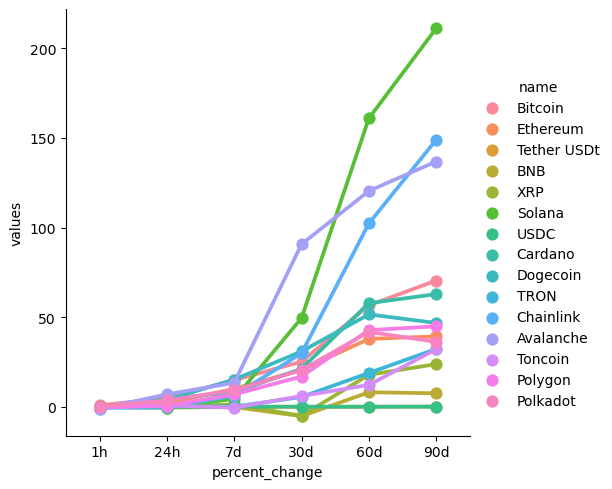

In [15]:
#Importing Packages

import seaborn as sns
import matplotlib.pyplot as plt

#Plotting Graph Using sns

sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [19]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,43793.65083,2023-12-05 16:22:40.480800


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

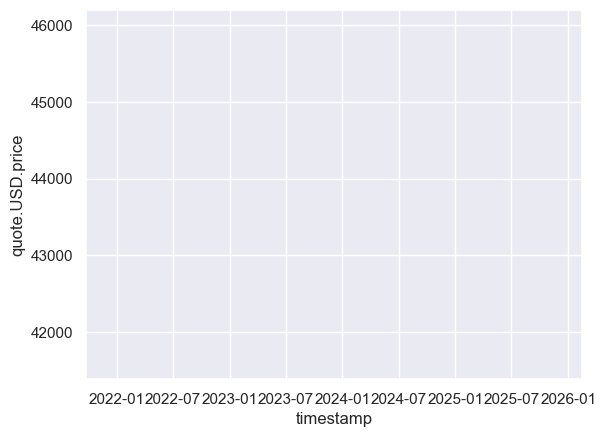

In [20]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data=df8)